In [4]:
import os
import numpy as np
from astropy.io import fits
from astropy.time import Time
#116.974, 50.300

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_20s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))
ts = []
# Open the data file for writing
with open('ref2.dat', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Extract file number
        file_number = file_name.split('.')[-3].split('_')[-1]

        # Extract time of observation from FITS header
        fits_file_path = os.path.join('../astrometric_files', 'calib_red_20s.' + file_number + '.new')
        with fits.open(fits_file_path) as hdul:
            header = hdul[0].header
            time_of_observation = header['DATE-OBS']

        t = Time(time_of_observation, format='fits', scale='utc')
        t_plot = t.jd
        
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))

        # Extract columns from the data
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 116.976) & (right_ascensions > 116.972)
        dec_mask = (decs < 50.32) & (decs > 50.28)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        if len(xo_flux) == 0:
            xo_flux = np.array([0.001])
            xo_flux_err = np.array([0.001])

        #print(file_name, t_plot, xo_flux, xo_flux_err)

        # Stack flux and flux error horizontally
        
        stacked_data = np.column_stack((t_plot,xo_flux, xo_flux_err))

        # Write the file name, time of observation, and the stacked data to the data file

        np.savetxt(f, stacked_data)


In [12]:
import os
import numpy as np
from astropy.io import fits
from astropy.time import Time
#116.974, 50.300

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_30s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))
ts = []
# Open the data file for writing
with open('ref2.dat2', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Extract file number
        file_number = file_name.split('.')[-3].split('_')[-1]

        # Extract time of observation from FITS header
        fits_file_path = os.path.join('../astrometric_files', 'calib_red_30s.' + file_number + '.new')
        with fits.open(fits_file_path) as hdul:
            header = hdul[0].header
            time_of_observation = header['DATE-OBS']

        t = Time(time_of_observation, format='fits', scale='utc')
        t_plot = t.jd
        
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))

        # Extract columns from the data
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 116.976) & (right_ascensions > 116.9722)
        dec_mask = (decs < 50.31) & (decs > 50.29)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        if len(xo_flux) == 0:
            xo_flux = np.array([0.001])
            xo_flux_err = np.array([0.001])

        #print(file_name, t_plot, xo_flux, xo_flux_err)

        # Stack flux and flux error horizontally
        
        stacked_data = np.column_stack((t_plot,xo_flux, xo_flux_err))

        # Write the file name, time of observation, and the stacked data to the data file

        np.savetxt(f, stacked_data)


Text(0.5, 1.0, 'REF 2: $\\alpha$ = 116.974, $\\delta$ = 50.3')

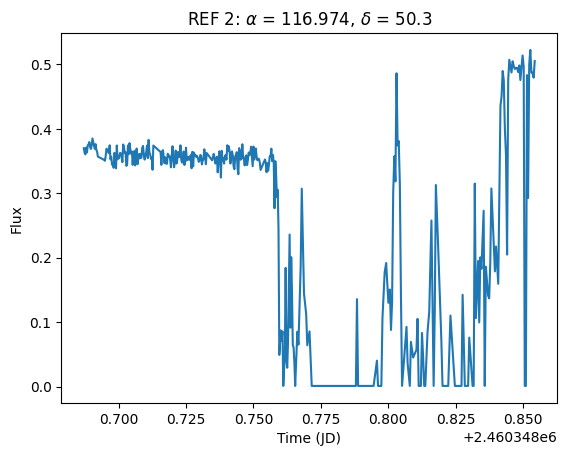

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#116.974, 50.300
alpha = 116.974
dec = 50.300

data = np.loadtxt('ref2.dat')

time = data[:,0]
flux = data[:,1]

plt.xlabel('Time (JD)')
plt.ylabel('Flux')
plt.plot(time,flux[:])
plt.title(rf'REF 2: $\alpha$ = {alpha}, $\delta$ = {dec}')